<a href="https://colab.research.google.com/github/NediaPutrii/big-data/blob/main/Tugas_Pertemua_12_Bab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Representation in Scikit-Learn**

**Data as table**

Cara merepresentasikan data agar dapat dimengerti komputer yaitu dengan dengan scikit-learn

dengan mempertimbangkan terms of table data.

Data sebagai tabel Tabel dasar adalah kisi data dua dimensi, di mana baris mewakili elemen individu dari kumpulan data, dan kolom mewakili jumlah yang terkait dengan masing-masing elemen.

Berikut contoh import dataset iris yang sering digunakan :

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


mengakses dataset iris dengan searborn dengan fungsi load_dataset()
menampilkan sebagian data iris dengan fungsi head()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


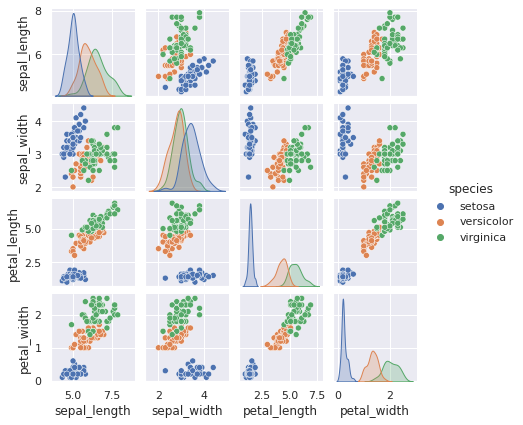

In [3]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', size=1.5);

kita bisa menggunakan seaborn untuk memvisualisasikan data dengan mudah

Agar bisa digunakan kita harus mengekstrak matriks fitur dan array target dari dataframe dengan operasi pandas

In [4]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [5]:
y_iris = iris['species']
y_iris.shape

(150,)

**Scikit-Learn’s Estimator API**

Scikit-Learn API dirancang dengan prinsip : consistency, inspection, limited object hierarchy, composition, sensible defaults.

**Supervised learning example: Simple linear regression**

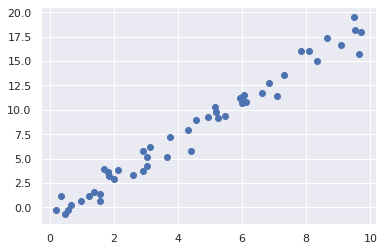

In [6]:
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

Data untuk regresi linier

1. Choose a class of mode

In [7]:
from sklearn.linear_model import LinearRegression

Dalam Scikit-Learn, setiap kelas model diwakili oleh kelas Python.
Misalnya, jika kita ingin menghitung model regresi linier sederhana, kita bisa
impor kelas regresi linier

2. Choose model hyperparameters

In [8]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Untuk contoh regresi linier ini, kita  membuat kelas instance LinearRegression
 dan sesuaikan intersep menggunakan fit_inter kecuali hyperparameter:

Scikit-Learn API memperjelas perbedaan
antara pilihan model dan penerapan model ke data

3. Arrange data into a features matrix and target vector.

In [9]:
X = x[:, np.newaxis]
X.shape

(50, 1)

variabel target y sudah dalam bentuk yang benar (array length-n_samples), 

tapi kita
perlu memberitahu data x untuk membuatnya menjadi matriks dengan ukuran [n_samples, n_features].

Dalam kasus ini, ini berarti pembentukan kembali sederhana dari array satu dimensi

4. Fit the model to your data

Perintah fit () menyebabkan sejumlah komputasi internal yang bergantung pada model berlangsung, dan hasil komputasi  disimpan dalam atribut khusus model yang dapat dieksplor pengguna

5. Predict labels for unknown data

Di Scikit-Learn, kita bisa melakukan ini menggunakan metode predict ().

In [10]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Seperti sebelumnya, kita perlu memaksa nilai x ini menjadi [n_samples, n_features] fitur matriks, setelah itu kita dapat memasukkannya ke model

In [11]:
model.coef_

array([1.9776566])

In [12]:
model.intercept_

-0.9033107255311146

In [13]:
xfit = np.linspace(-1, 11)

In [14]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

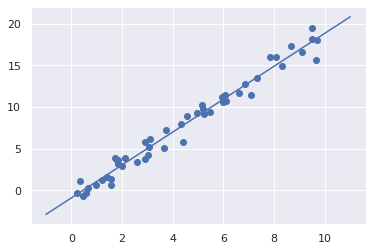

In [15]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

plot visualisasi data, berikut plot scatter

**Supervised learning example: Iris classification**

In [27]:
pip install seaborn

In [32]:
!pip install sklearn

**Supervised learning example: Iris classification**

denagn data iris yang ada, seberapa baik kita dapat memprediksi label yang tersisa?

Pada kasus ini kita menggunakan  Gaussian naive baiyes distribution.


kita akan mengevaluasi model pada data yang belum pernah dilihat sebelumnya, jadi kita akan membagi data menjadi satu training set dan satu testing set. Ini bisa dilakukan dengan tangan, tapi memang begitu lebih mudah menggunakan fungsi utilitas train_test_split:

In [35]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

In [36]:
from sklearn.naive_bayes import GaussianNB  # 1. choose model class
model = GaussianNB()                        # 2. instantiate model
model.fit(Xtrain, ytrain)                   # 3. fit model to data
y_model = model.predict(Xtest)              # 4. predict on new data

dengan data yang sudah tersusun, kit dapat memprediksi labels

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

dengan menggunakan accuracy_score kita dapat melihat prediksi label yang cocok dengan nilai sebenarnya
dengan hasil akurasi : 97%

**Unsupervised learning example: Iris dimensionality**

kita dapat mengurangi dimensi data iris agar lebih muudah memvisualisasikannya.

kita menggunakan prinsip PCA (Principal COmponent Analysis) yang merupakan teknik pengurangan dimensi linear yang cepat.

In [24]:
from sklearn.decomposition import PCA # 1. Choose the model class
model = PCA(n_components=2) # 2. Instantiate the model with hyperparameters
model.fit(X_iris) # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris) # 4. Transform the data to two dimensions

seperti langkah sebelumnya

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


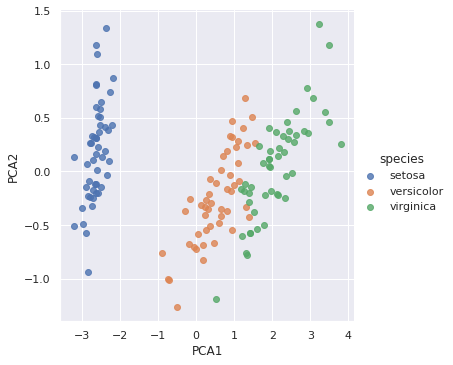

In [25]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

gambarkan hasilnya dengan memasikkan dataframe iris original dan gunakan implot seaborn untuk menunjukkan hasil

**Unsupervised learning: Iris clustering**


Di sini kita akan menggunakan file
metode pengelompokan yang kuat yang disebut model campuran Gaussian (GMM)

GMM mencoba
untuk memodelkan data sebagai kumpulan gumpalan Gaussian.

In [48]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=3,
            covariance_type='full') # 2. Instantiate the model w/ hyperparameters
model.fit(X_iris) # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris) # 4. Determine cluster labels

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


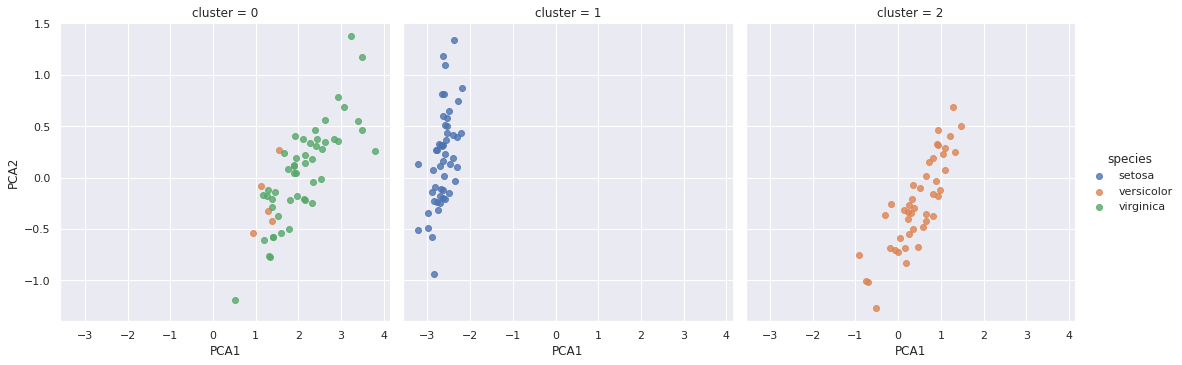

In [49]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);

dengan memisahkan data dengan cluster, kita melihat seberapa baik GMM memulihkan label dasar.

Ini berarti bahwa bahkan tanpa seorang ahli untuk memberi tahu kita label spesies setiap bunga, ukuran bunga-bunga ini cukup berbeda sehingga kita bisa
secara otomatis mengidentifikasi keberadaan berbagai kelompok spesies ini dengan algoritme pengelompokan sederhana!




**Application: Exploring Handwritten Digits**

masalah pengenalan karakter optik: identifikasi tulisan tangan


Di sini kita akan menggunakan kumpulan angka yang telah diformat sebelumnya dari Scikit-Learn,

**Loading and visualizing the digits data**

Kami akan menggunakan antarmuka akses data Scikit-Learn dan melihat data ini:

In [50]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

Data citra adalah array tiga dimensi: 1.797 sampel, masing-masing terdiri dari file
8 × 8 kotak piksel.

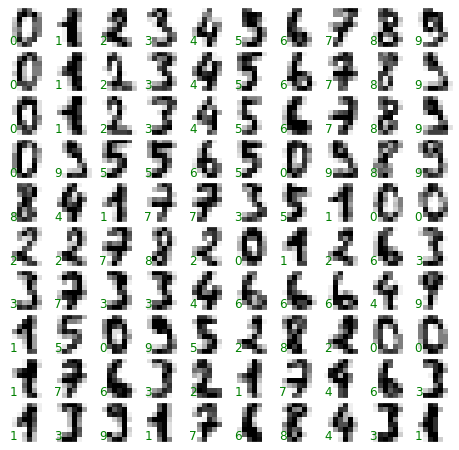

In [51]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')


Untuk bekerja dengan data ini dalam Scikit-Learn, kita membutuhkan dua dimensi,
Representasi [n_samples, n_features].


We can accomplish this by treating each
pixel in the image as a feature—that is, by flattening out the pixel arrays so that we
have a length-64 array of pixel values representing each digit. 



Data angka tulisan tangan; setiap sampel diwakili oleh satu kotak berukuran 8 × 8
piksel

In [52]:
X = digits.data
X.shape

(1797, 64)

dapat kita lihat di sini ada 1.797 sampel dan 64 fitur

In [53]:
y = digits.target
y.shape

(1797,)

**Unsupervised learning: Dimensionality reduction**

kita akan visualisasikan ke dalam ruang parameter 64 dimensi, namun karna sulit kita akan reduksi dimensinya



In [54]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

reduksi dimensi menjadi 2

dan plot data dengan *isomap* sehingga kitabisa pelajari strukturnya

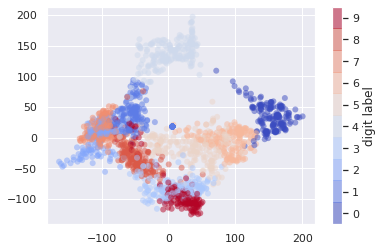

In [58]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('coolwarm', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

Isomap yang menyematkan data digit

**Classification on digits**

klasifikasi ke angka, bagi data menjadi set training dan testing dengan menyesuaikan model Gaussian naive bayes

In [59]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [60]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

dihasilkan akurasi 83%

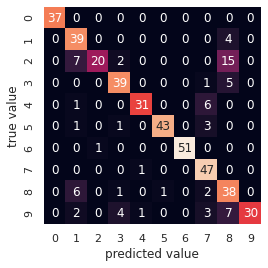

In [62]:
from sklearn.metrics import confusion_matrix
 
mat = confusion_matrix(ytest, y_model)
 
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

confusion matrix yang menunjukkan frekuensi kesalahan klasifikasi oleh klasifikasi yang ada

Ini menunjukkan kepada kita di mana titik-titik yang salah diberi label cenderung berada: misalnya, sejumlah besar
dua di sini salah diklasifikasikan sebagai satu atau delapan.

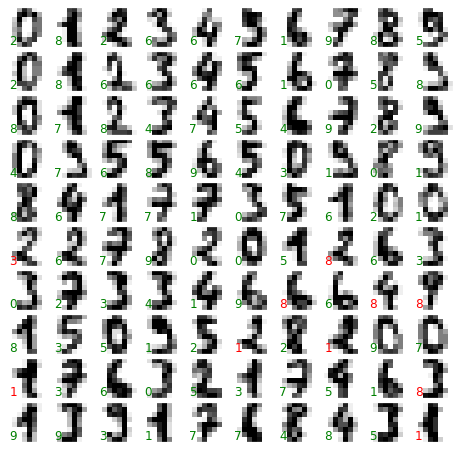

In [63]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
 
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

Data menunjukkan label yang benar (hijau) dan salah (merah); untuk versi warna
dari plot

# **Hyperparameters and Model Validation**

**Model validation the wrong way**

In [64]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

loading data iris

Selanjutnya kami memilih model dan hyperparameter. Di sini kita akan menggunakan pengklasifikasi k-neighbours
dengan n_neighbours = 1. Ini adalah model yang sangat sederhana dan intuitif yang mengatakan "label dari
titik yang tidak diketahui sama dengan label titik pelatihan terdekatnya

In [65]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [66]:
model.fit(X, y)
y_model = model.predict(X)

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

dengan akurasi 100%, maka 100% poin benar diberi label

**Model validation the right way: Holdout sets**

Kita bisa lebih memahami performa model menggunakan apa
dikenal sebagai set pisahan; artinya, kami menahan beberapa subset data dari pelatihan
model, lalu gunakan set pisahan ini untuk memeriksa kinerja model. Kita dapat
lakukan pemisahan ini menggunakan utilitas train_test_split di Scikit-Learn:

In [69]:
from sklearn.model_selection import train_test_split
# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.5)

# fit the model on one set of data
model.fit(X1, y1)

# evaluate the model on the second set of data
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)


0.9066666666666666

dihasilkan akurasi yang lebih masuk akal yaitu 90%,

**Model validation via cross-validation**

kita melakukan dua uji validasi secara bergantian dengan setiap data sebagian pisahan set. menggunakan data terpisah dari sebelumnya.

In [70]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)

Yang keluar adalah dua skor akurasi, yang bisa kita gabungkan (dengan, katakanlah, mengambil
berarti) untuk mendapatkan ukuran yang lebih baik dari kinerja model global.

In [73]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

Di sini kita membagi data menjadi lima kelompok, dan menggunakan masing-masing secara bergiliran untuk mengevaluasi
model fit pada 4/5 data lainnya.

In [76]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

kita mungkin dapat  kasus ekstrim di mana jumlah kita
lipatan sama dengan jumlah titik data; artinya, kami berlatih di semua poin kecuali satu poin
setiap percobaan. Jenis validasi silang ini dikenal sebagai validasi silang tinggalkan satu kali


Karena kita memiliki 150 sampel, validasi silang leave-one-out menghasilkan skor untuk 150
uji coba, dan skor menunjukkan prediksi yang berhasil (1.0) atau tidak berhasil (0.0).

In [77]:
scores.mean()

0.96

**Selecting the Best Model**

**Validation curves in Scikit-Learn**

Kita dapat menggeneralisasi ini ke sejumlah fitur polinomial. Di Scikit-Learn, kami bisa
menerapkan ini dengan regresi linier sederhana yang dikombinasikan dengan polinomial pra-
prosesor. kita akan menggunakan pipeline untuk merangkai operasi ini bersama-sama (kita akan diskusikan
fitur polinomial dan pipeline

In [79]:
 from sklearn.preprocessing import PolynomialFeatures
 from sklearn.linear_model import LinearRegression
 from sklearn.pipeline import make_pipeline

 def PolynomialRegression(degree=2, **kwargs):
     return make_pipeline(PolynomialFeatures(degree),
                          LinearRegression(**kwargs))

In [80]:
import numpy as np

def make_data(N, err=1.0, rseed=1):

    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
      y += err * rng.randn(N)
      return X, y
X, y = make_data(40)

create data sesui model

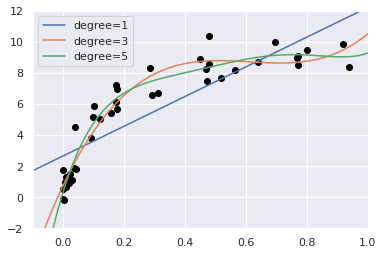

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # plot formatting

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

lalu viaslisasikan data menggunaan plot, dihasilkan tiga perbedaan polonomial model fit dengan data set

Kita dapat membuat kemajuan dalam hal ini dengan memvisualisasikan kurva validasi khusus ini
data dan model; kita bisa melakukan ini secara langsung menggunakan validation_curve conve‐
rutinitas ilmu pengetahuan disediakan oleh Scikit-Learn. Diberikan model, data, nama parameter, dan a
rentang untuk dijelajahi, fungsi ini akan secara otomatis menghitung skor pelatihan dan
skor validasi di seluruh rentang

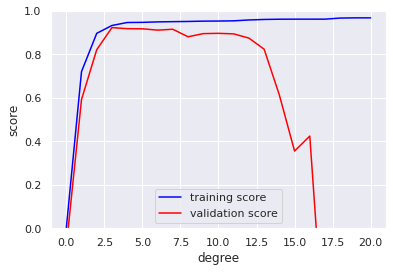

In [84]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          'polynomialfeatures__degree',
                                          degree, cv=7)
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

Kurva validasi untuk data

Dari kurva validasi, kita dapat membaca bahwa trade-off yang optimal antara bias
dan varians ditemukan untuk polinomial orde tiga; kita dapat menghitung dan menampilkan ini
menyesuaikan data asli sebagai berikut

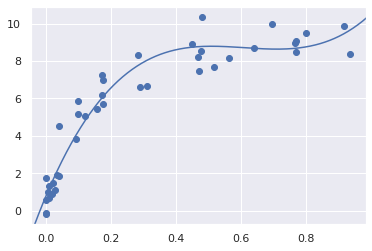

In [85]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

Model optimal yang divalidasi silang untuk data

**Leaning Curves**

Salah satu aspek penting dari kompleksitas model adalah model yang optimal secara umum
bergantung pada ukuran data pelatihan Anda. Misalnya, mari buat set data baru
dengan faktor lima poin lagi (Gambar 5-30):

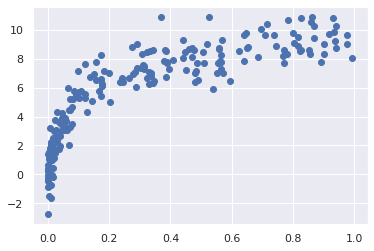

In [86]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2);

Data untuk menunjukkan kurva pembelajaran

kita akan menduplikasi kode sebelumnya untuk memplot kurva validasi untuk data yang lebih besar ini-
set; untuk referensi mari kita plot hasil sebelumnya juga

(0.0, 1.0)

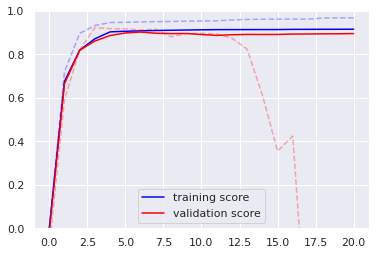

In [87]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
                                            'polynomialfeatures__degree',
                                            degree, cv=7)
plt.plot(degree, np.median(train_score2, 1), color='blue',
         label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3,
         linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3,
         linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)


Kurva pembelajaran untuk model polinomial sesuai dengan data di

**Learning curves in Scikit-Learn**

Scikit-Learn menawarkan utilitas yang nyaman untuk menghitung kurva pembelajaran seperti itu dari Anda
model; di sini kita akan menghitung kurva pembelajaran untuk dataset asli kita dengan model polinomial urutan kedua dan polinomial urutan kesembilan

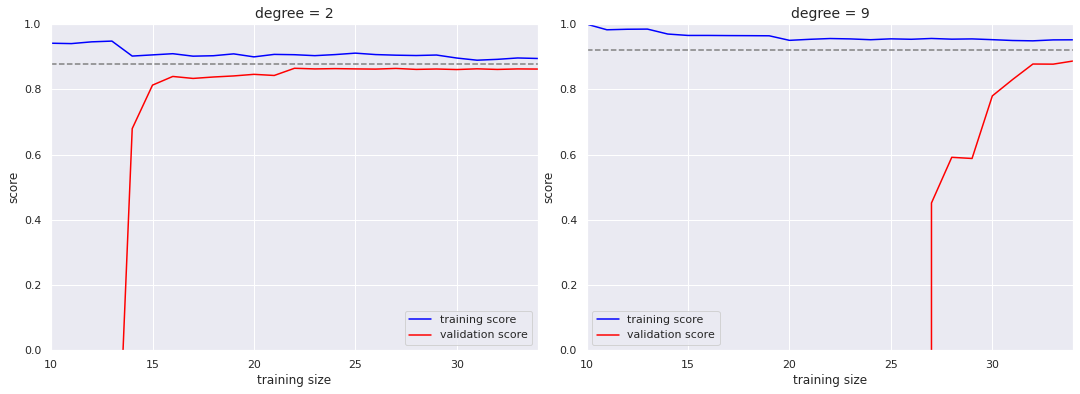

In [90]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))
    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray',
                 linestyle='dashed')
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')


Kurva pembelajaran untuk model dengan kompleksitas rendah (kiri) dan model dengan kompleksitas tinggi
model (kanan)

**Validation in Practice: Grid Search**

ini adalah
contoh penggunaan pencarian grid untuk menemukan model polinomial yang optimal. kita akan mengeksplorasi kisi tiga dimensi fitur model — yaitu, derajat polinomial,
flag yang memberi tahu kita apakah akan memasang intersep, dan flag memberi tahu kami apakah harus
malisasikan masalahnya. 

Kita dapat mengatur ini menggunakan metaestimator GridSearchCV Scikit-Learn

In [92]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

gunakan mode fit() untuk menyesuaikan

In [93]:
grid.fit(X, y);

In [94]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

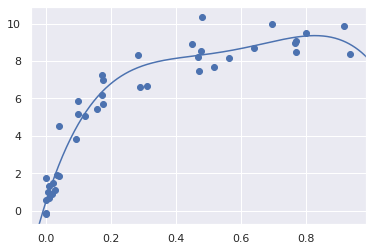

In [96]:
model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

Pencarian kisi menyediakan lebih banyak opsi, termasuk kemampuan untuk menentukan
tom scoring function, untuk memparalelkan perhitungan, untuk melakukan pencarian acak,
dan banyak lagi.